# 使用sklearn的多层感知机

实验内容：  
1. 学习标准化处理的方法
2. 使用sklearn.neural_network.MLPClassifier完成Breast_Cancer_Wisconsin结果预测问题
3. 绘制学习率为3，1，0.1，0.01训练集损失函数的变化曲线

## 1. 读取数据集

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data/Breast_Cancer_Wisconsin/data')
print(data.shape)

(569, 33)


In [3]:
data = data.values 
data_x = data[:,2:-1]
data_y = data[:,1:2]
data_y = np.reshape(data_y,(-1))

print(data_x.shape)
print(data_y.shape)

(569, 30)
(569,)


## 2. 划分数据集

In [4]:
from sklearn.model_selection import train_test_split

取40%为测试集，60%为训练集

In [5]:
trainX, testX, trainY, testY = train_test_split(data_x, data_y, test_size = 0.4, random_state = 32)

In [6]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((341, 30), (341,), (228, 30), (228,))

## 3. 数据预处理

In [7]:
from sklearn.preprocessing import StandardScaler

神经网络的训练方法一般是基于梯度的优化算法，如梯度下降，为了让这类算法能更好的优化神经网络，我们往往需要对数据集进行归一化，这里我们选择对数据进行标准化

$$X' = \frac{X - \bar{X}}{\mathrm{std}(X)}$$

其中，$\bar{X}$是均值，$\mathrm{std}$是标准差。减去均值可以让数据以0为中心，除以标准差可以让数据缩放到一个较小的范围内。这样可以使得梯度的下降方向更多样，同时缩小梯度的数量级，让学习变得稳定。  
首先需要对训练集进行标准化，针对每个特征求出其均值和标准差，然后用训练集的每个样本减去均值除以标准差，就得到了新的训练集。然后用测试集的每个样本，减去训练集的均值，除以训练集的标准差，完成对测试集的标准化。

In [8]:
# 初始化一个标准化器的实例
standard = StandardScaler()

# 对训练集进行标准化，它会计算训练集的均值和标准差保存起来
trainX = standard.fit_transform(trainX)

# 使用标准化器在训练集上的均值和标准差，对测试集进行归一化
testX = standard.transform(testX)

可以打印看一下数据集归一化后的效果，均值很接近0

In [9]:
trainX.mean(), testX.mean()

(3.5839692243617955e-16, 0.010251633786963645)

## 4. 引入模型

In [10]:
from sklearn.neural_network import MLPClassifier

我们使用sklearn中自带的MLPClassifier，MLP是多层感知机(multi-layer perceptron)的简称。  
在训练的时候需要指定参数，这里我们需要设置的几个参数有：
1. solver: 'sgd'，这个参数的含义是，使用随机梯度下降作为优化算法
2. learning_rate: 'constant'，学习率固定，不衰减
3. momentum: 0，动量设置为0，这是随机梯度下降需要的一个参数，我们设置为0即可
4. max_iter: 设定最大迭代轮数，如果超过这个轮数还没有收敛，就停止训练，并抛出一个warning
5. learning_rate_init: 这个参数需要我们进行调整，这是学习率

这个模型会判断，如果连续两轮损失值都没有减少了，就停止训练。

In [11]:
model = MLPClassifier(solver = 'sgd', learning_rate = 'constant', momentum = 0, learning_rate_init = 0.1, max_iter = 500)
model.fit(trainX, trainY)
prediction = model.predict(testX)

## 5. 预测与评估

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(prediction, testY)

0.9605263157894737

精度达到了97.8%

## 6. 绘制训练集损失函数值的变化曲线

我们可以通过model.loss_curve_获取模型在训练过程中，损失函数损失值的变化曲线

Text(0, 0.5, 'loss')

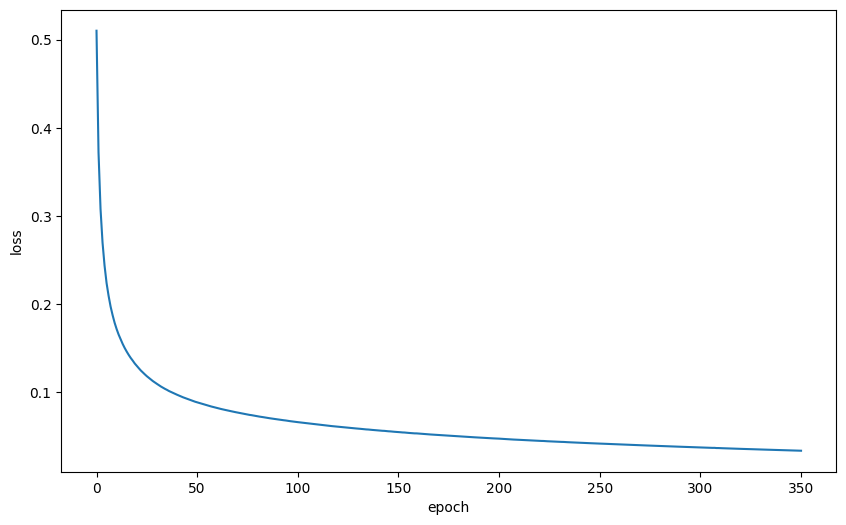

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.plot(model.loss_curve_)
plt.xlabel('epoch')
plt.ylabel('loss')

可以看到随着迭代轮数的增加，loss降低地越来越缓慢

## test：请你在一张图内，绘制出学习率为3，学习率为1，学习率为0.1，学习率为0.01，四个模型的损失函数变化曲线，最大迭代轮数为250轮。

提示：分别训练4个模型，然后在一张图中分别绘制4个模型的loss_curve_即可。

C:\Users\苍山沐雪\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\苍山沐雪\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 1000x1000 with 0 Axes>

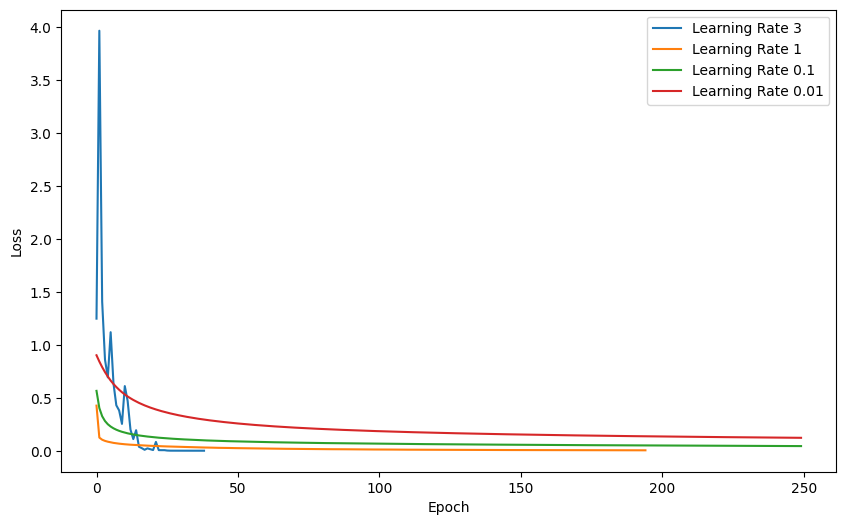

In [15]:
plt.figure(figsize = (10, 10))
# YOUR CODE HERE
# Define the learning rates to be tested
learning_rates = [3, 1, 0.1, 0.01]

# Create a list to store the loss curves for each model
loss_curves = []

# Train and plot the loss curves for each model
for learning_rate in learning_rates:
    # Create the MLPClassifier model with the specified learning rate and maximum iterations
    model = MLPClassifier(solver='sgd', learning_rate='constant', momentum=0, learning_rate_init=learning_rate, max_iter=250)
    
    # Train the model
    model.fit(trainX, trainY)
    
    # Store the loss curve for the model
    loss_curves.append(model.loss_curve_)

# Plot the loss curves for all models
plt.figure(figsize=(10, 6))
labels = ['Learning Rate 3', 'Learning Rate 1', 'Learning Rate 0.1', 'Learning Rate 0.01']
for i, loss_curve in enumerate(loss_curves):
    plt.plot(loss_curve, label=labels[i])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
